Question 2

create the dataframe

simplify calculations by converting row data to column data

In [1]:
import pandas as pd

In [2]:
data = {'Output,Q':[80,150,135,165,95,130,110],
        'Labour,L':[60,100,100,120,70,90,80],
        'Capital,K':[50,100,80,100,60,80,70]
       }
df = pd.DataFrame(data,columns = ['Output,Q','Labour,L','Capital,K'],
                  index = ['B','C','D','E','F','G','H'])
df.columns.name = 'Country'
df

Country,"Output,Q","Labour,L","Capital,K"
B,80,60,50
C,150,100,100
D,135,100,80
E,165,120,100
F,95,70,60
G,130,90,80
H,110,80,70


question a. 
For each the data series(Q,L and K)calculate its mean, variance, standard deviation, and median values.

mean

In [3]:
df.mean()

Country
Output,Q     123.571429
Labour,L      88.571429
Capital,K     77.142857
dtype: float64

variance

In [4]:
df.var()

Country
Output,Q     914.285714
Labour,L     414.285714
Capital,K    357.142857
dtype: float64

standard deviation

In [5]:
df.std()

Country
Output,Q     30.237158
Labour,L     20.354010
Capital,K    18.898224
dtype: float64

median values

In [6]:
df.median()

Country
Output,Q     130.0
Labour,L      90.0
Capital,K     80.0
dtype: float64

question b. Plot histograms of the two data series Q and L.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline

the histogram of data sereis Q

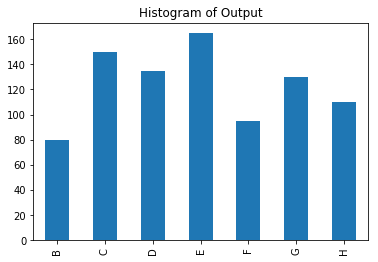

In [10]:
df['Output,Q'].plot(kind = 'bar', title = 'Histogram of Output')

the histogram of data sereis L

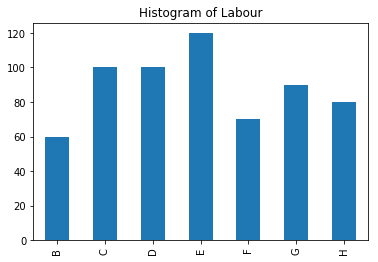

In [11]:
df['Labour,L'].plot(kind = 'bar', title = 'Histogram of Labour')

question c. 

In [12]:
import numpy as np

In [13]:
df1 = np.log(df)
df1

Country,"Output,Q","Labour,L","Capital,K"
B,4.382027,4.094345,3.912023
C,5.010635,4.605170,4.605170
D,4.905275,4.605170,4.382027
E,5.105945,4.787492,4.605170
F,4.553877,4.248495,4.094345
G,4.867534,4.499810,4.382027
H,4.700480,4.382027,4.248495


question d

according to the previous question, the function can be converted to $logQ = \alpha logL + \beta log K + logA$

so we can fit a multiple regression model to the log values.

assume $logQ = y$, $logL = x_1$, $logK = x_2$, $logA = b$
the function is
$y = \alpha x_1 + \beta x_2 + b$

first, visualize the relationship between the features and the respose.

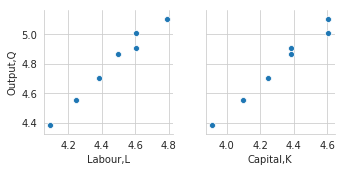

In [14]:
sns.pairplot(df1, x_vars = ['Labour,L','Capital,K'],
             y_vars = 'Output,Q')
plt.show()

the result shows that both Labour and Capital have a strong linear correlation with Output

In [15]:
import sklearn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [16]:
feature_cols = ['Labour,L','Capital,K']
X = df1[feature_cols]
y = df1['Output,Q']
model = linreg.fit(X,y)
b = linreg.intercept_
a, c = linreg.coef_[0:]
mlr = 'module: y = {:.3f}b + {:.3f}x_1 + {:.3f}x_2'\
.format(b, a, c)
print(mlr)

module: y = 0.146b + 0.548x_1 + 0.509x_2


$ \alpha + \beta = 0.548 + 0.509 = 1.057 \neq1$ , so the model is not homogeneous of degree one

question e

In [17]:
y_pred = linreg.predict(X)
resid = y - y_pred
resid

B    0.000136
C   -0.004038
D    0.004123
E   -0.008718
F   -0.005309
G    0.024166
H   -0.010360
Name: Output,Q, dtype: float64

Text(0, 0.5, 'Output residuals $(y-\\hat{y})$')

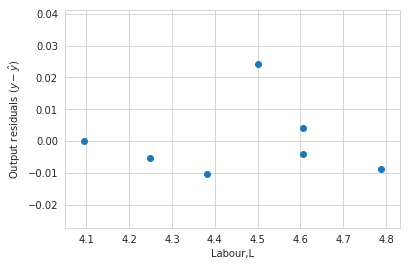

In [18]:
fig, ax = plt.subplots()
plt.scatter(df1['Labour,L'],resid)
plt.xlabel("Labour,L")
plt.ylabel("Output residuals $(y-\hat{y})$")

Text(0, 0.5, 'Output residuals $(y-\\hat{y})$')

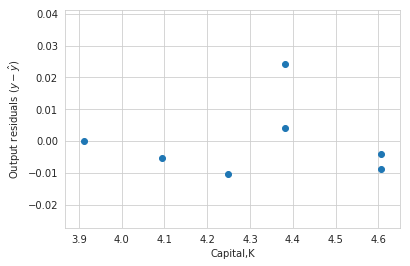

In [19]:
fig, ax = plt.subplots()
plt.scatter(df1['Capital,K'],resid)
plt.xlabel("Capital,K")
plt.ylabel("Output residuals $(y-\hat{y})$")

question f

$R^2$

In [20]:
from sklearn.metrics import r2_score
R_2 = r2_score(y_pred,y)
R_2

0.997913215612455

$\bar{R}^2 = R^2-\frac{k-1}{n-k}(1-R^2)$

In [21]:
R_2_a = R_2 - (2-1)/(7-2)*(1-R_2)
R_2_a

0.9974958587349461